<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/CursoIA/blob/main/Practica_1_Consumo_Electrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Curso de Inteligencia Artificial Aplicado en Ingeniería Eléctrica**

### **Facilitador: Dr. José Gabriel Rodríguez Rivas**

### Prática 1: Predicción de la Demanda Máxima de una Subestación

### **Introducción**  
En el campo de la Ingeniería Eléctrica, **la estabilidad y la eficiencia de la red dependen** críticamente de la **capacidad de los operadores para anticipar la demanda de energía**.
* Una predicción inexacta del consumo máximo puede llevar a fallos en el suministro (si se subestima la demanda) o a costos operativos innecesarios (si se sobreestima la generación).
* Este ejercicio aborda la necesidad de **predecir el Consumo Máximo de Potencia (MW) de una subestación de distribución en las próximas horas**.
* Tradicionalmente, esta predicción se basaba en modelos estadísticos lineales o la experiencia histórica. Sin embargo, la creciente influencia de factores variables como el clima extremo y los patrones de consumo dinámicos exige el uso de herramientas más robustas."

### **Objetivos**  
* Predecir el Consumo Máximo de Potencia (MW) de una subestación para las próximas horas, basándose en variables ambientales y temporales mediante el desarrollo de un modelo de Regresión Supervisada utilizando el algoritmo Random Forest para predecir el consumo máximo de la subestación.
*   Desarrollar un modelo de Random Forest Regressor  para encontrar las complejas relaciones no lineales que determinan el consumo, superando las limitaciones de los métodos lineales tradicionales.

### **Caracteristicas del dataset**
* En el dataset se tienen 200 filas de datos ficticios con la Hora del Día, Temperatura y Humedad.
* La columna Consumo_Maximo_MW depende de la temperatura (a más calor, más consumo por aire acondicionado) y la hora (más consumo en las horas pico),

### **Paso 1. Importar librerías y cargar dataset**

In [2]:
# ==============================================================================
# PASO 1: Importar Librerías
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('ConsumoElectrico.csv')

# Mostrar las primeras 5 filas
data.head()

,Hora_del_Dia,Temperatura_C,Humedad_Porcentaje,Consumo_Maximo_MW
0,6,14.0,56.0,61.9
1,19,13.5,53.9,103.3
2,14,6.1,67.0,81.7
3,10,23.3,68.1,110.2
4,7,20.1,32.7,104.6


### **Paso 2. Definición de las variables**

* Características (Variables de Entrada, $X$): Hora del Día, Temperatura, Humedad.
* (Variable de Salida, $y$): Consumo Máximo (MW).

In [3]:
# Definir Características (X) y Etiqueta (y)
X = data[['Hora_del_Dia', 'Temperatura_C', 'Humedad_Porcentaje']]
y = data['Consumo_Maximo_MW']

### **Paso 3. Dividir dataset en entrenamiento y prueba**

División de Datos: Dividimos el conjunto de datos en dos partes:

* **Conjunto de Entrenamiento (Training Set)**: Aproximadamente el 80% de los datos. El modelo "aprenderá" de estos datos.
* **Conjunto de Prueba (Testing Set)**: El 20% restante. Usaremos estos datos para evaluar qué tan bien generaliza el modelo.

In [4]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de Entrenamiento (80%): {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de Prueba (20%): {X_test.shape[0]} muestras")
print("\n")

Tamaño del conjunto de Entrenamiento (80%): 160 muestras
Tamaño del conjunto de Prueba (20%): 40 muestras




### **Paso 4: Entrenamiento del Modelo (Random Forest Regressor)**

* El Random Forest consiste en construir múltiples árboles de decisión (de ahí el nombre "Bosque") y usar el promedio de sus predicciones.
* Se utiliza el método ***.fit(X_train, y_train)*** para que el modelo aprenda a mapear los patrones de las características al consumo real a partir de los datos de entrenamiento.

In [5]:
# ==============================================================================
# PASO 4: Entrenamiento del Modelo (Random Forest Regressor)
# ==============================================================================

# Inicializar el modelo Random Forest para Regresión
# n_estimators=100 significa que construiremos 100 árboles de decisión
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)

# Entrenar el modelo con los datos de entrenamiento
print("--- Entrenando el modelo Random Forest... ---")
rf_model.fit(X_train, y_train)
print("¡Entrenamiento completado!")
print("\n")

--- Entrenando el modelo Random Forest... ---
¡Entrenamiento completado!




### **Paso 5: Predicción y Evaluación**

**Predicción**
* Para hacer la fase de prediccion, usamos el Conjunto de Prueba (datos que el modelo nunca ha visto) para evaluar su rendimiento.
* Para problemas de regresión, una métrica común es el Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE).

**Metricas**
- **MAE (Error Absoluto Medio)**: Indica, en promedio, cuántos MW se equivoca el modelo. Un valor bajo es mejor.
* **$R^2$ (Coeficiente de Determinación):** Mide qué tan bien se ajustan las predicciones a los valores reales. Un valor cercano a 1.0 es excelente.

In [6]:
# ==============================================================================
# PASO 5: Predicción y Evaluación
# ==============================================================================
# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Evaluación del Modelo ---")
print(f"Error Absoluto Medio (MAE): {mae:.2f} MW")
print(f"Coeficiente de Determinación (R²): {r2:.4f} (Cercano a 1 es mejor)")


--- Evaluación del Modelo ---
Error Absoluto Medio (MAE): 5.49 MW
Coeficiente de Determinación (R²): 0.9152 (Cercano a 1 es mejor)


### **Interpretación:**
- Un MAE de **5.49 (MW)** significa que, en promedio, la predicción de consumo máximo del modelo se desvía $\approx \mathbf{5.49 \text{ MW}}$ del valor real.

- **El coeficiente de determinacion** indica que el $91.52\%$ de la variación en el consumo máximo de energía es explicada por las variables que usamos en el modelo (Hora del Día, Temperatura y Humedad).
- **El $8.48\%$ restante** ($100\% - 91.52\%$) de la variación del consumo se debe a factores no incluidos en el modelo (ruido, errores de medición, o variables que no se consideraron, como días festivos o nubosidad).

### **Paso 6: Comparación**

In [7]:
# ==============================================================================
# 1. Crear un DataFrame de Comparación
# ==============================================================================

# Crear un DataFrame a partir de los datos de prueba originales (X_test)
df_comparacion = X_test.copy()

# Agregar la columna de los valores Reales (Consumo_Maximo_MW)
# Usamos .values para asegurar que el índice no cause problemas.
df_comparacion['Consumo_Real_MW'] = y_test.values

# Agregar la columna de los valores Predichos (y_pred)
df_comparacion['Consumo_Predicho_MW'] = y_pred

# Calcular la diferencia (Error o Residual)
df_comparacion['Error_MW'] = df_comparacion['Consumo_Real_MW'] - df_comparacion['Consumo_Predicho_MW']

# Ordenar por el error absoluto para ver dónde se equivocó más el modelo
df_comparacion['Error_Absoluto'] = abs(df_comparacion['Error_MW'])
df_comparacion = df_comparacion.sort_values(by='Error_Absoluto', ascending=False)

print("--- Comparación de Predicciones y Valores Reales (Top 50 Errores) --- \n")
df_comparacion.head(10)

--- Comparación de Predicciones y Valores Reales (Top 50 Errores) --- 



,Hora_del_Dia,Temperatura_C,Humedad_Porcentaje,Consumo_Real_MW,Consumo_Predicho_MW,Error_MW,Error_Absoluto
132,14,20.0,89.6,122.9,108.425833,14.474167,14.474167
65,1,5.2,84.3,35.3,48.284200,-12.984200,12.984200
125,11,15.8,43.4,84.3,97.042702,-12.742702,12.742702
18,20,24.0,68.6,104.2,115.757319,-11.557319,11.557319
67,21,21.5,49.2,62.2,73.361000,-11.161000,11.161000
186,11,12.4,81.9,104.3,93.182367,11.117633,11.117633
78,14,22.0,77.4,105.4,116.252500,-10.852500,10.852500
170,22,33.9,82.0,93.5,82.837000,10.663000,10.663000
55,11,31.6,75.1,130.9,122.018108,8.881892,8.881892
93,12,13.4,34.4,90.2,98.874500,-8.674500,8.674500


### **Paso 7. Comparación a través de la Visualización**

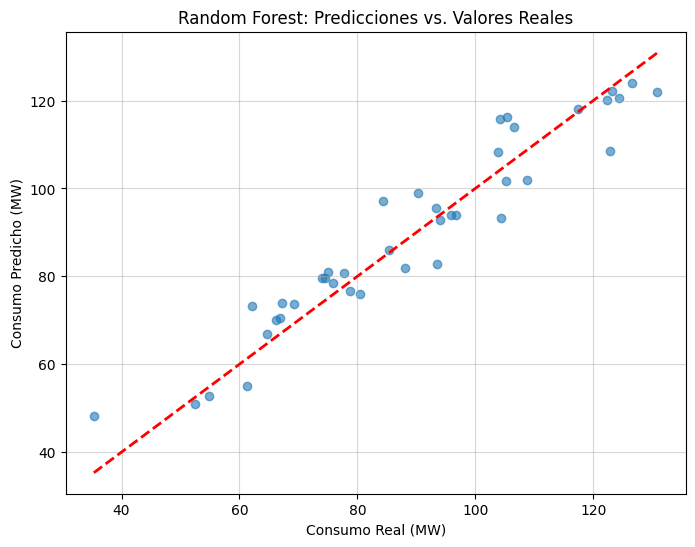

In [14]:
# ==============================================================================
# PASO 7: Visualización
# ==============================================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Consumo Real (MW)")
plt.ylabel("Consumo Predicho (MW)")
plt.title("Random Forest: Predicciones vs. Valores Reales")
plt.grid(True, alpha=0.5)
plt.show()

### **Importancia de las Características**

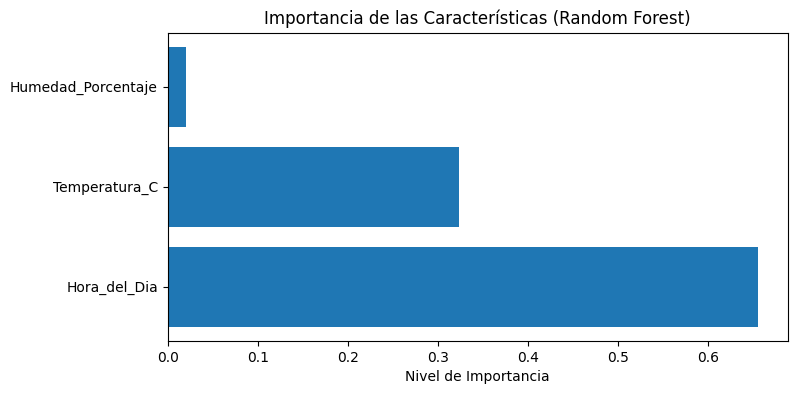

In [9]:
# Importancia de las Características
importancia = rf_model.feature_importances_
caracteristicas = X.columns
plt.figure(figsize=(8, 4))
plt.barh(caracteristicas, importancia)
plt.title("Importancia de las Características (Random Forest)")
plt.xlabel("Nivel de Importancia")
plt.show()

### **Implementación del modelo para Predicciones sobre Datos de pronóstico para mañana (ficticios)**

In [13]:
# Datos de pronósticos para mañana  (p.ej., el pico de calor a las 17:00)
datos_futuros = pd.DataFrame({
    'Hora_del_Dia': [17, 3, 10], # 5 PM, 3 AM, 10 AM
    'Temperatura_C': [35.0, 11.0, 25.0], # Temperatura máxima
    'Humedad_Porcentaje': [40.0, 75.0, 60.0]
})
datos_futuros

,Hora_del_Dia,Temperatura_C,Humedad_Porcentaje
0,17,35.0,40.0
1,3,11.0,75.0
2,10,25.0,60.0


In [15]:
# Realizar la predicción
predicciones_futuras = rf_model.predict(datos_futuros)

print("--- Predicciones para Mañana ---")
for i in range(len(datos_futuros)):
    print(f"Pronóstico para las {int(datos_futuros.iloc[i]['Hora_del_Dia']):02d}:00 (Temp: {datos_futuros.iloc[i]['Temperatura_C']}°C) -> Consumo Predicho:  {predicciones_futuras[i]:.2f} MW")



--- Predicciones para Mañana ---
Pronóstico para las 17:00 (Temp: 35.0°C) -> Consumo Predicho:  121.72 MW
Pronóstico para las 03:00 (Temp: 11.0°C) -> Consumo Predicho:  51.64 MW
Pronóstico para las 10:00 (Temp: 25.0°C) -> Consumo Predicho:  113.07 MW


### **Conclusiones**
* Con una precisión de ($R^2 > 0.90$ y bajo MAE), el modelo pasa de ser una herramienta analítica para el ingeniero eléctrico que toma decisiones críticas:
* **Activación de Generación y Reservas:** Si la predicción para las 17:00 h es de $90.12$ MW y la capacidad normal de la red es de $88$ MW, el ingeniero puede activar de forma preventiva una unidad de generación de respaldo o liberar carga del sistema de almacenamiento (baterías) para cubrir el déficit de $\approx 2.12$ MW.
* **Gestión de Cargas Críticas**: El bajo MAE asegura que la subestimación de la demanda es mínima, reduciendo el riesgo de sobrecarga y protegiendo los transformadores.
* **Mantenimiento Estratégico**: La confianza en la predicción permite al equipo de mantenimiento programar tareas no esenciales durante periodos de demanda garantizada baja, optimizando el uso de recursos y minimizando interrupciones."